# TikZ 绘制中学几何题

chenshuo@chenshuo.com

最新版： https://github.com/chenshuo/typeset/

TikZ 有专门的 `tkz-euclide` 宏包，例子可参考 https://github.com/jamesfang8499/math2/

这里用基础的 TikZ 语法来绘制中学几何习题，满足基本的个人需求。

https://github.com/mkrphys/ipython-tikzmagic.git

In [1]:
# !pip install git+git://github.com/chenshuo/ipython-tikzmagic.git

%load_ext tikzmagic

## 基础语法

https://tikz.dev/tikz-coordinates

### 直角坐标

(x, y)

3-4-5 直角三角形 right triangle

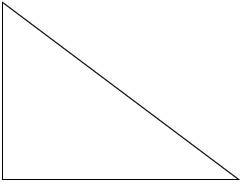

In [24]:
%%tikz

\draw (0, 3) -- (0, 0) -- (4, 0) -- cycle;

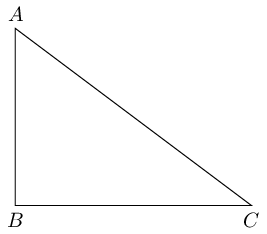

In [4]:
%%tikz

\draw (0, 3) node [above] {$A$} -- (0, 0) node [below] {$B$} -- (4, 0) node [below] {$C$}  -- cycle;

等腰三角形 isosceles triangle

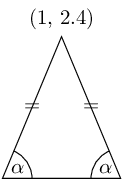

In [32]:
%%tikz -l angles,quotes
\draw (0, 0) coordinate (B) -- (1, 2.4) coordinate (A) node [midway] {=} node [above] {(1, 2.4)}
  -- (2, 0) coordinate (C) node [midway] {=} -- cycle;
\draw pic [draw,"$\alpha$"] {angle=C--B--A};
\draw pic [draw,"$\alpha$"] {angle=A--C--B};

### 极坐标

(angle:radius)

正三角形 equilateral triangle

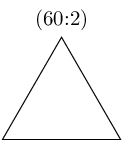

In [31]:
%%tikz

\draw (0, 0) -- (60:2) node [above] {(60:2)} -- (2, 0) -- cycle;

斜边处于水平位置的直角三角形

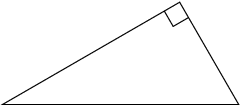

In [30]:
%%tikz -l angles

\draw (-2, 0) coordinate (A) -- (60:2) coordinate (C) -- (2, 0) coordinate (B) -- cycle;
\draw pic [draw,angle radius=3mm] {right angle=A--C--B};

### 中点及延长线

https://tikz.dev/tikz-coordinates#sec-13.5.3

AB 中点 `($(A)!0.5!(B)$)`

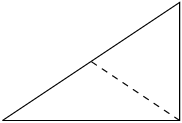

In [29]:
%%tikz -l calc

\draw (0, 0) coordinate (A) -- (3, 2) coordinate (B) |- (A) coordinate [midway] (C);
\draw [dashed] (C) -- ($(A)!0.5!(B)$);

AB 延长线 `($(A)!2.0!(B)$)`

AB 反向延长线 `($(A)!-1!(B)$)`

### 距离

从 A 到 B 距离 A 点 1cm：`($(A)!1cm!(B)$)`

https://tikz.dev/tikz-coordinates#sec-13.5.4

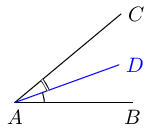

In [39]:
%%tikz -l calc,angles

% 角平分线 angle bisector
% https://math.stackexchange.com/questions/2032931/bisectrix-of-a-triangle-in-tikz

\draw (0, 0) coordinate (A) node [below] {$A$} -- (2, 0) coordinate (B) node [below] {$B$};
\draw (A) -- (1.8, 1.5) coordinate (C) node [right] {$C$};
\draw [blue] let
    \p1=($(A)!2cm!(B)$),
    \p2=($(A)!2cm!(C)$),
    \p3=($(\p1)!0.5!(\p2)$)
  in (A) -- (\p3) coordinate (D) node [right] {$D$};
\draw pic [draw] {angle=B--A--D};
\draw pic [draw, angle radius=6mm,double] {angle=D--A--C};

### 偏转角

`($(A)!0.5!90:(B)$)` 从 A 点出发，向 B 顺时针偏转 90 度的方向，前进 0.5 倍 AB 距离。

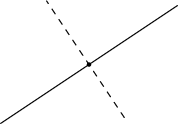

In [3]:
%%tikz -l calc,angles

% 垂直平分线 perpendicular bisector

\draw (0, 0) coordinate (A) -- (3, 2) coordinate (B);
\fill ($(A)!0.5!(B)$) coordinate (C) circle (1pt);
\draw [dashed] ($(C)!0.6!90:(A)$) coordinate (D)
  -- ($(D)!2.2!(C)$);

从 A 点出发，向 B 顺时针偏转 90 度的方向，前进 1cm：`($(A)!1cm!90:(B)$)`

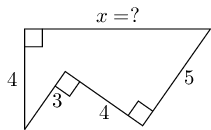

In [43]:
%%tikz -l calc,angles
\draw (0, 0) coordinate (A)
-- (55:1.2) coordinate (B) node [midway,right] {3}
-- ($(B)!1.6cm!90:(A)$) coordinate (C) node [midway,below] {4}
-- ($(C)!2cm!-90:(B)$) coordinate (D) node [midway,right] {5}
-| (A) coordinate [midway] (E);

\draw ($(A)!0.5!(E)$) node [left] {4} ($(D)!0.5!(E)$) node [above] {$x=?$};
\draw pic [draw,angle radius=3mm] {right angle=A--B--C};
\draw pic [draw,angle radius=3mm] {right angle=B--C--D};
\draw pic [draw,angle radius=3mm] {right angle=A--E--D};

### 垂线

`($(A)!(P)!(B)$)`

Altitude lengths are 210, 170, 357. What is the perimeter?

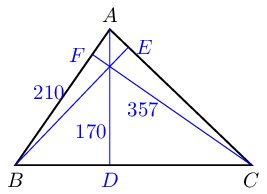

In [4]:
%%tikz -l calc

\draw [thick] (0, 0) coordinate (B) node [below] {$B$} -- (4, 0) coordinate (C) node [below] {$C$}
  -- (1.6, 2.3) coordinate (A)  node [above] {$A$} --cycle;
\draw [blue] (A) -- ($(B)!(A)!(C)$) coordinate (D) node [below] {$D$} node [near end,left=-2pt] {170}
  (B) -- ($(A)!(B)!(C)$) coordinate (E) node [right] {$E$} node [midway, above left] {210}
  (C) -- ($(A)!(C)!(B)$) coordinate (F) node [left] {$F$} node [midway, left=3pt] {357};

### 直线的交点

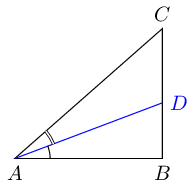

In [31]:
%%tikz -l calc,angles

\draw (0, 0) coordinate (A) node [below] {$A$} -- (2.5, 0) coordinate (B) node [below] {$B$} 
-- (2.5, 2.2) coordinate (C) node [above] {$C$} -- cycle;
\draw [blue] let
    \p1=($(A)!1cm!(B)$),
    \p2=($(A)!1cm!(C)$),
    \p3=($(\p1)+(\p2)-(A)$)
  in (A) -- (intersection of A--\p3 and B--C) coordinate (D) node [right] {$D$};
\draw pic [draw, angle radius=6mm] {angle=B--A--D};
\draw pic [draw, angle radius=7mm,double] {angle=D--A--C};


### 圆、扇型、圆弧

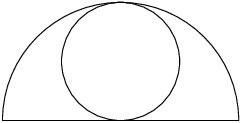

In [28]:
%%tikz

\draw (0, 1) circle (1);
\draw (2, 0) arc (0:180:2) -- cycle;

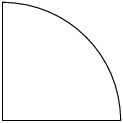

In [27]:
%%tikz

\draw (2, 0) coordinate (B) arc (0:90:2) |- (B);

### 曲线交点

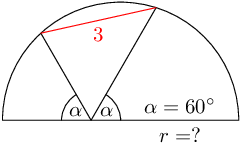

In [26]:
%%tikz -l angles,intersections,quotes

\draw [name path=semi] (2, 0) coordinate (B) arc (0:180:2) coordinate (A) -- cycle;
\path [name path=line1] (-0.5, 0) coordinate (C) -- ++(60:2.3);
\path [name path=line2] (C) -- ++(120:2);
\draw [name intersections={of=semi and line1, by=E}] (C) -- (E);
\draw [name intersections={of=semi and line2, by=D}] (C) -- (D);
\draw [red] (D) -- (E) node [midway,below] {3};
\draw pic [draw, "$\alpha$"] {angle=B--C--E};
\draw pic [draw, "$\alpha$"] {angle=D--C--A};
\draw (1, 0) node [above] {$\alpha=60^\circ$} node [below] {$r=?$};

## 例题

$EF \perp CD$, $|EF|=|DF|=|CF|$

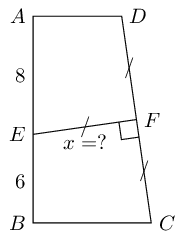

In [13]:
%%tikz -l math,calc,angles

\draw (2, 0) coordinate (C) node [right] {$C$} -- (0, 0) node [left] {$B$}
  -- (0, 3.5) node [left] {$A$} -- (1.5, 3.5) node [right] {$D$} -- cycle
node [near start] {/} node [near end] {/}
coordinate [midway] (F);

\draw (0, 1.5) coordinate (E) node [left] {$E$}
  -- (F) node [right] {$F$} node [midway] {/} node [midway,below] {$x=?$};
\draw pic [draw,angle radius=3mm] {right angle=C--F--E};
\draw (0, 0.7) node [left] {6};
\draw (0, 2.5) node [left] {8};

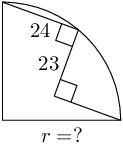

In [15]:
%%tikz -l calc,math,angles

\draw (0, 0) coordinate (O) -- (2, 0) coordinate (D) arc (0:90:2) coordinate (A) -- cycle;
\draw (A) -- (50:2) coordinate (B) node [midway, below] {24};
\draw ($(B)!1cm!90:(A)$) coordinate (B1);
\draw (D) -- ($(B1)!(D)!(B)$) coordinate (C) -- (B) node [midway,left] {23};
\draw pic [draw,angle radius=3mm] {right angle=A--B--C};
\draw pic [draw,angle radius=3mm] {right angle=D--C--B};
\draw (1, 0) node [below] {$r=?$};


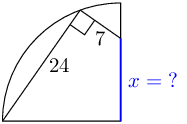

In [8]:
%%tikz -l angles,calc

\coordinate (O) at (0, 0);
\coordinate (T) at (0, 2);
\draw (-2, 0) coordinate (A) arc (180:90:2) |- (A);
\draw (110:2) coordinate (B) -- (A) node [midway,right] {24};
\draw ($(B)!1cm!90:(A)$) coordinate (B2)
  (B) -- (intersection of B--B2 and O--T) coordinate (C) node [midway,below] {7};
\draw pic [draw, angle radius=3mm] {right angle=C--B--A};
\draw [thick,blue] (O) -- (C) node [midway, right] {$x=\;?$};

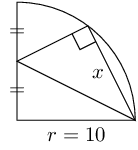

In [35]:
%%tikz -l calc,angles,intersections

\draw [name path=quarter] (0, 0) -- (2, 0) coordinate (C) node [midway,below] {$r=10$} arc (0:90:2) -- cycle;
\draw (0, 0.5) node {=} (0, 1.5) node {=};
\coordinate (A) at (0, 1);
\coordinate (D) at (-2, 0);
\path [name path=line1] (A) -- ($(A)!-1!(D)$);
\path [name intersections={of=line1 and quarter, by=B}];
\draw (A) -- (B) -- (C) node [midway,left] {$x$} -- cycle;
\draw pic [draw,angle radius=3mm] {right angle=A--B--C};

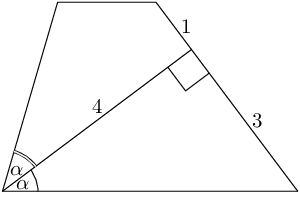

In [36]:
%%tikz -l math,calc,angles,quotes

\tikzmath{\a=atan(3/4);}

\draw (0, 0) coordinate (A) -- (5, 0) coordinate (B);
\draw (A) -- (\a:4) coordinate (E) node [midway,above] {4} -- (B)  node [midway,right] {3};
\draw (E) -- ($(B)!4/3!(E)$) coordinate (C) node [midway,right] {1};
\draw (C) ++(-1, 0)coordinate (C1);
\coordinate (D1) at (2*\a:1);
\draw (C) -- (intersection of C--C1 and A--D1) coordinate (D) -- (A);
\draw pic [draw] {right angle=A--E--B}
  pic [draw,"$\alpha$", angle radius=6mm] {angle=B--A--E}
  pic [draw,"$\alpha$", angle radius=7mm,double] {angle=E--A--D};

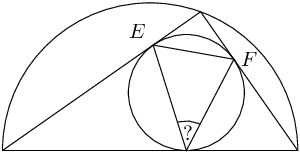

In [25]:
%%tikz -l calc,math,angles,through,quotes

\tikzset{
  angle bisector/.style n args={4}{
    insert path={
        let \p1 = ($(#2)!1cm!(#1)$),
        \p2 = ($(#2)!1cm!(#3)$),
        \p3 = ($(\p1)+(\p2)-(#2)$) in
        (intersection of #1--#3 and #2--\p3) coordinate (#4)
    }   
  }
}

\tikzmath{\r=2.5;};
\draw (\r, 0) coordinate (B) arc (0:180:2.5) coordinate (A) -- cycle;
\draw (A) -- (70:2.5) coordinate (C) -- (B)  ;
\draw [angle bisector={A}{B}{C}{B1}];
\draw [angle bisector={B}{A}{C}{A1}];
\coordinate (O) at (intersection of B--B1 and A--A1);
\draw ($(A)!(O)!(C)$) coordinate (E) node [above left] {$E$}
  -- ($(B)!(O)!(C)$) coordinate (F) node [right] {$F$};
\node [draw] at (O) [circle through={(E)}] {}; 
\draw (E) -- ($(A)!(O)!(B)$) coordinate (D) -- (F);
\draw pic [draw,"?"] {angle=F--D--E};